In [1]:
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime as dt
from matplotlib.dates import DateFormatter
%matplotlib notebook

In [2]:
# Read CSV
cases_data = pd.read_csv('covid19cases_test.csv')
vaccine_data= pd.read_csv('covid19vaccinesbycounty.csv')


In [15]:
vaccine_data = vaccine_data.rename(columns={"administered_date": "date"})

merge_data = pd.merge(cases_data, vaccine_data, 
                   on='date', 
                   how='left')
  
# displaying result
merge_data

,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,...,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
0,2/1/2020,Alameda,County,1685886.0,3.0,0.0,4.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/1/2020,Alpine,County,1117.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/1/2020,Amador,County,38531.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/1/2020,Butte,County,217769.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/1/2020,Calaveras,County,44289.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504221,4/28/2021,Tuolumne,County,52351.0,0.0,0.0,NaN,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504222,4/28/2021,Unknown,County,NaN,0.0,0.0,NaN,NaN,-15.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504223,4/28/2021,Ventura,County,852747.0,0.0,0.0,NaN,NaN,20.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504224,4/28/2021,Yolo,County,223612.0,0.0,0.0,NaN,NaN,24.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Import California counties
ca_counties_cases_csv = "covid19cases_test.csv" 
ca_counties_cases_df = pd.read_csv(ca_counties_cases_csv, encoding="utf-8")
ca_counties_cases_df.sort_values(by = 'area', ascending = True)

,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,2/1/2020,Alameda,County,1685886.0,3.0,0.0,4.0,0.0,0.0,0.0,NaN
22814,2/9/2021,Alameda,County,1685886.0,267.0,9.0,14435.0,389.0,283.0,12.0,7612.0
4819,4/20/2020,Alameda,County,1685886.0,51.0,2.0,746.0,54.0,47.0,1.0,NaN
3843,4/4/2020,Alameda,County,1685886.0,36.0,1.0,269.0,26.0,73.0,1.0,NaN
23790,2/25/2021,Alameda,County,1685886.0,123.0,6.0,10818.0,172.0,111.0,11.0,9250.0
...,...,...,...,...,...,...,...,...,...,...,...
14700,9/28/2020,Yuba,County,79290.0,10.0,0.0,195.0,10.0,3.0,0.0,124.0
8844,6/24/2020,Yuba,County,79290.0,3.0,0.0,117.0,2.0,2.0,0.0,121.0
18787,12/4/2020,Yuba,County,79290.0,68.0,0.0,380.0,76.0,43.0,0.0,263.0
914,2/15/2020,Yuba,County,79290.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [4]:
ca_counties_vaccine_csv = "covid19vaccinesbycounty.csv"
ca_counties_vaccine_df = pd.read_csv(ca_counties_vaccine_csv, encoding="utf-8")
ca_counties_vaccine_df.sort_values(by = 'county', ascending = True)

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
654,Alameda,4/26/2021,7800,1419774,5459,838194,2331,497177,10,84403,4872,320176,2910,590911,4889,911087,California
557,Alameda,1/19/2021,5521,82182,3329,49891,2192,32291,0,0,4334,55177,1185,13496,4336,68673,California
558,Alameda,1/20/2021,6691,88873,4026,53917,2665,34956,0,0,5398,59298,1281,14777,5402,74075,California
559,Alameda,1/21/2021,7741,96614,3382,57299,4359,39315,0,0,6913,65392,822,15599,6916,80991,California
560,Alameda,1/22/2021,6838,103452,2032,59331,4806,44121,0,0,5700,69963,1131,16730,5702,86693,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7851,Yuba,1/22/2021,103,2534,6,1195,97,1339,0,0,94,1859,9,338,94,2197,California
7850,Yuba,1/21/2021,210,2431,95,1189,115,1242,0,0,202,1774,8,329,202,2103,California
7849,Yuba,1/20/2021,132,2221,87,1094,45,1127,0,0,109,1580,23,321,109,1901,California
7847,Yuba,1/18/2021,60,2009,32,978,28,1031,0,0,35,1444,25,283,35,1727,California


In [5]:
county1 = input("What name? ")

What name? Los Angeles


In [6]:
ca_counties_cases_df = ca_counties_cases_df.loc[ca_counties_cases_df["area"]== county1]
ca_counties_cases_df.sort_values(by = 'date', ascending = False)


,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
13500,9/9/2020,Los Angeles,County,10257557.0,932.0,28.0,42117.0,1534.0,659.0,57.0,13500.0
13439,9/8/2020,Los Angeles,County,10257557.0,1050.0,31.0,46402.0,1767.0,413.0,4.0,32324.0
13378,9/7/2020,Los Angeles,County,10257557.0,629.0,29.0,10077.0,477.0,488.0,26.0,42790.0
13317,9/6/2020,Los Angeles,County,10257557.0,533.0,23.0,9299.0,498.0,744.0,3.0,41226.0
13256,9/5/2020,Los Angeles,County,10257557.0,573.0,23.0,12005.0,600.0,1176.0,24.0,47112.0
...,...,...,...,...,...,...,...,...,...,...,...
21186,1/13/2021,Los Angeles,County,10257557.0,11610.0,255.0,121432.0,16325.0,11690.0,263.0,141644.0
21125,1/12/2021,Los Angeles,County,10257557.0,13121.0,282.0,123218.0,17150.0,11861.0,306.0,167718.0
21064,1/11/2021,Los Angeles,County,10257557.0,14517.0,293.0,147165.0,19423.0,12651.0,134.0,171796.0
21003,1/10/2021,Los Angeles,County,10257557.0,5463.0,296.0,38613.0,5932.0,13834.0,159.0,168816.0


In [7]:
ca_counties_vaccine_df = ca_counties_vaccine_df.loc[ca_counties_vaccine_df["county"]==county1]
ca_counties_vaccine_df.sort_values(by = 'administered_date', ascending = False)

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
2898,Los Angeles,4/9/2021,128634,5766790,55818,2890763,49392,2613997,23424,262030,55948,1586778,72446,2214744,79291,3801522,California
2897,Los Angeles,4/8/2021,130142,5638156,57143,2834945,49236,2564605,23763,238606,59412,1579933,70494,2142298,83097,3722231,California
2896,Los Angeles,4/7/2021,118222,5508014,53858,2777802,43532,2515369,20832,214843,54113,1567330,63889,2071804,74879,3639134,California
2895,Los Angeles,4/6/2021,119426,5389792,56196,2723944,43185,2471837,20045,194011,55478,1556340,63744,2007915,75454,3564255,California
2894,Los Angeles,4/5/2021,90378,5270366,43856,2667748,36631,2428652,9891,173966,44521,1544630,45701,1944171,54393,3488801,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2812,Los Angeles,1/13/2021,29227,354840,15610,224657,13617,130183,0,0,20291,219586,8919,67549,20296,287135,California
2811,Los Angeles,1/12/2021,29190,325613,16066,209047,13124,116566,0,0,19064,208209,10108,58630,19072,266839,California
2810,Los Angeles,1/11/2021,25766,296423,16229,192981,9537,103442,0,0,14838,199245,10917,48522,14846,247767,California
2809,Los Angeles,1/10/2021,4647,270657,3627,176752,1020,93905,0,0,1920,195316,2727,37605,1921,232921,California


In [8]:
## ca_counties_cases_df['area']


<IPython.core.display.Javascript object>


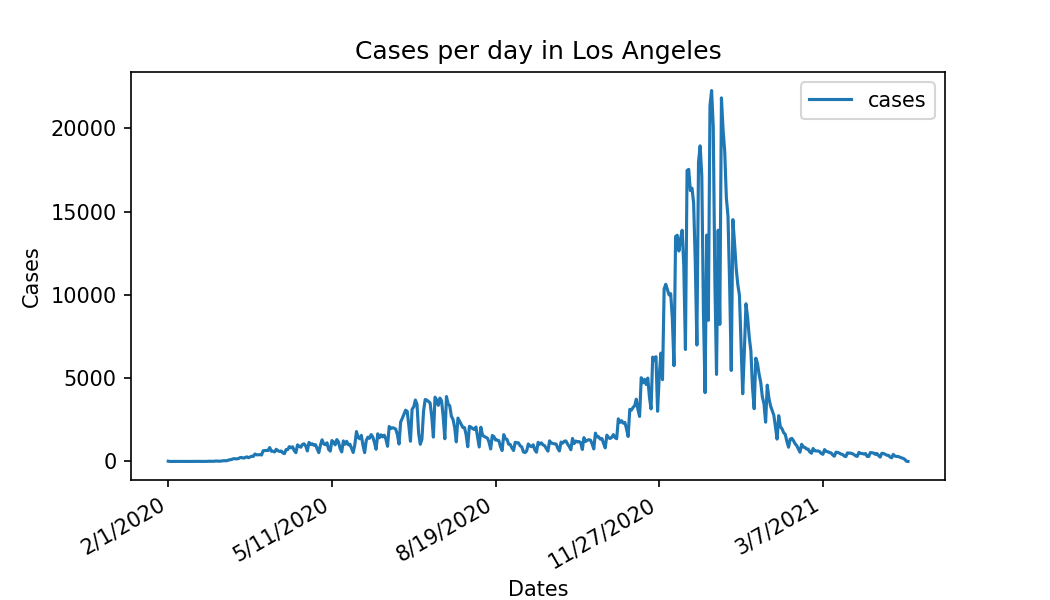

In [9]:
cases_plot = ca_counties_cases_df.plot('date', 'cases',kind="line", figsize=(7,4))
plt.title(f"Cases per day in {county1}")
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.gcf().autofmt_xdate()
plt.show()



<IPython.core.display.Javascript object>


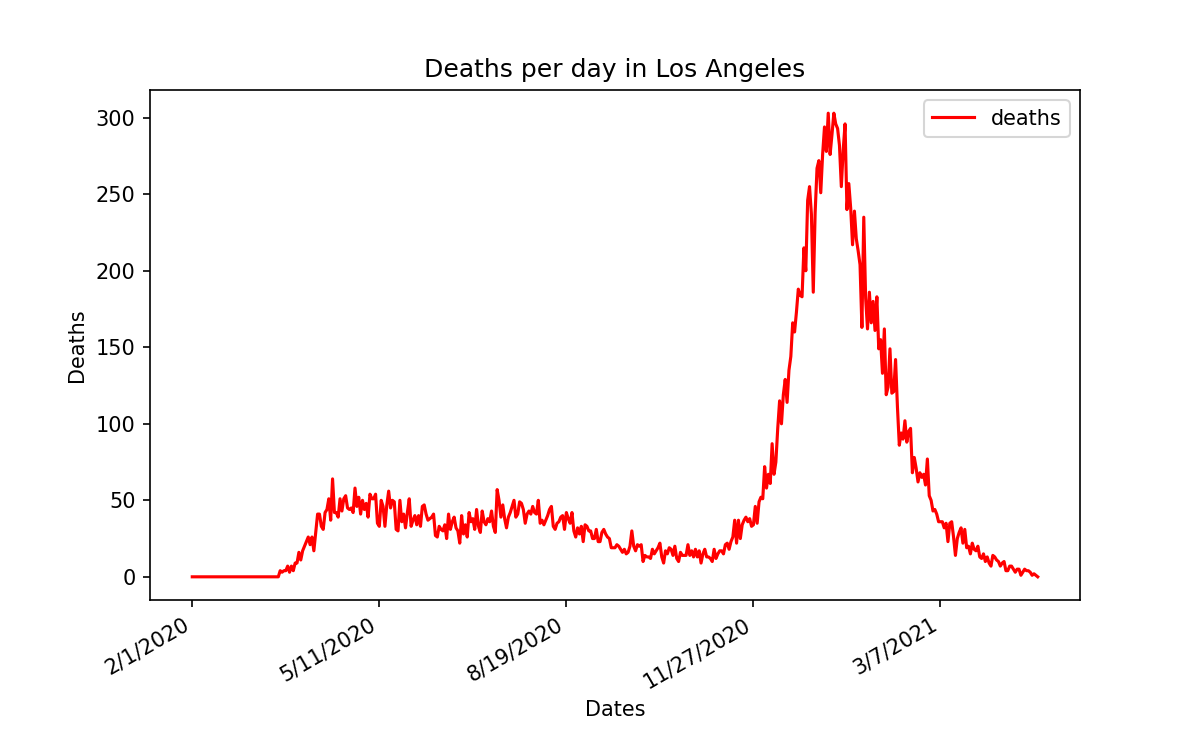

In [10]:
deaths_plot = ca_counties_cases_df.plot('date', 'deaths',kind="line", color="red", figsize=(8,5))
plt.title(f"Deaths per day in {county1}")
plt.xlabel("Dates")
plt.ylabel("Deaths")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

<IPython.core.display.Javascript object>


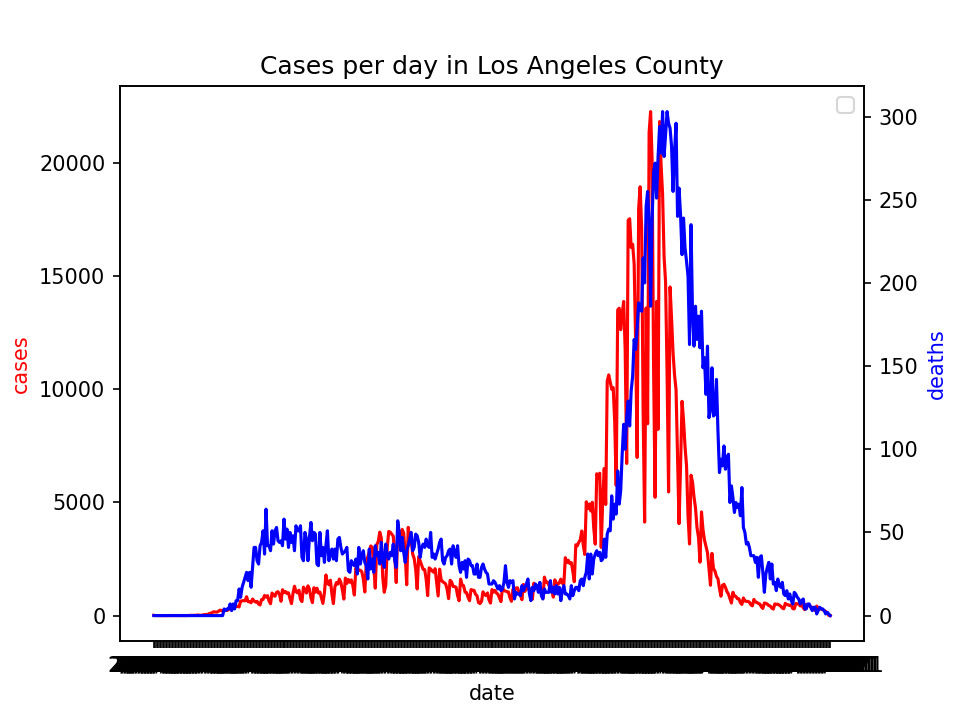

No handles with labels found to put in legend.


In [12]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(ca_counties_cases_df.date, ca_counties_cases_df.cases, color="red")
# set x-axis label
ax.set_xlabel("date")
# set y-axis label
ax.set_ylabel("cases",color="red")


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(ca_counties_cases_df.date, ca_counties_cases_df["deaths"],color="blue")
ax2.set_ylabel("deaths",color="blue")



plt.title(f"Cases per day in {county1} County")
plt.legend()

plt.show()




<IPython.core.display.Javascript object>


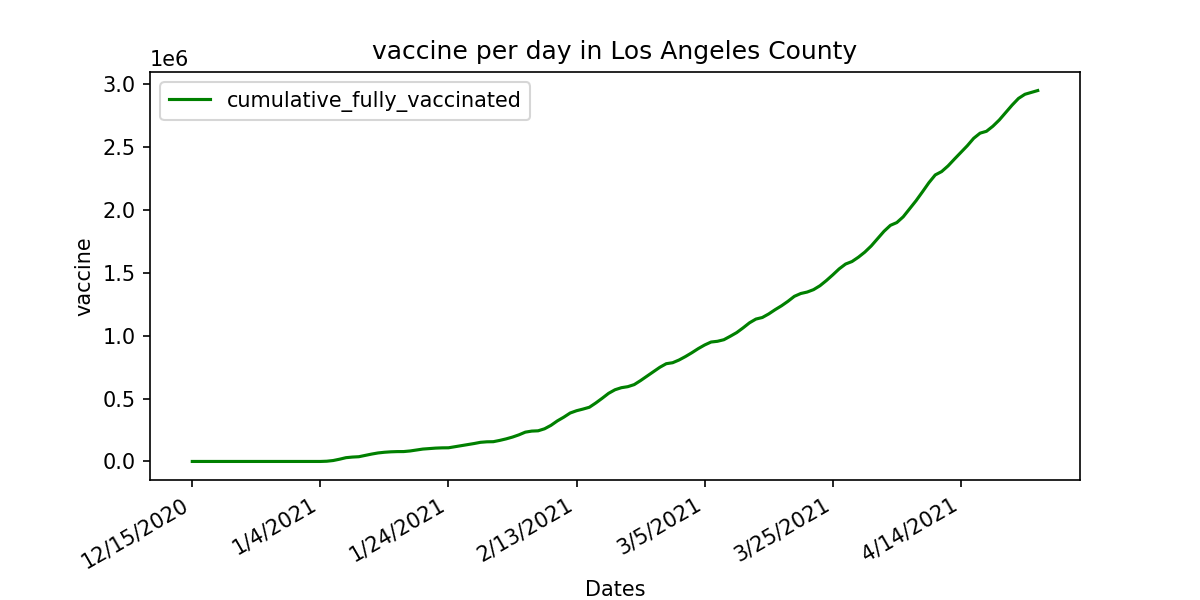

In [14]:

vaccine_plot = ca_counties_vaccine_df.plot('administered_date', 
                                           'cumulative_fully_vaccinated',
                                           kind="line", color= "green", figsize=(8,4))
plt.title(f"Vaccine per Day in {county1} County")
plt.xlabel("Dates")
plt.ylabel("vaccine")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


<IPython.core.display.Javascript object>


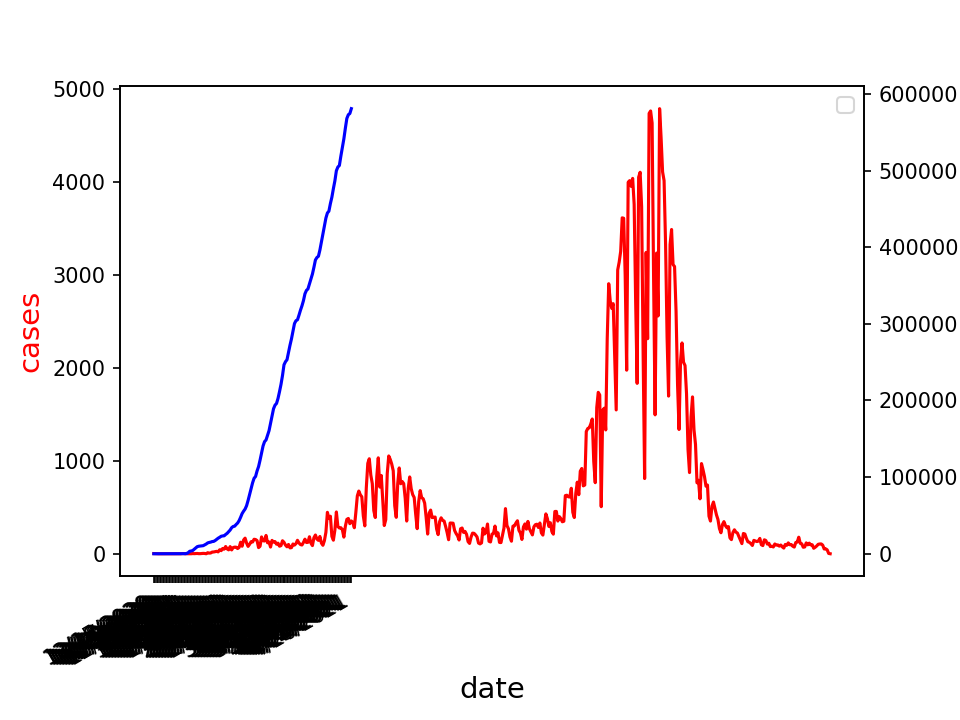

No handles with labels found to put in legend.


In [62]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(ca_counties_cases_df.date, ca_counties_cases_df.cases, color="red")
# set x-axis label
ax.set_xlabel("date",fontsize=14)
# set y-axis label
ax.set_ylabel("cases",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(ca_counties_vaccine_df.administered_date, ca_counties_vaccine_df["cumulative_fully_vaccinated"],color="blue")
ax2.set_ylabel("vaccine",color="blue",fontsize=14)
plt.show()



#vaccine_plot = ca_counties_vaccine_df.plot('administered_date', 
                                           #'cumulative_fully_vaccinated',
                                          # kind="line", color= "green", figsize=(8,6))
#plt.title(f"vaccine per day in {county1}")
#plt.xlabel("Dates")
#plt.ylabel("vaccine")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()



In [15]:
vaccine_data = vaccine_data.rename(columns={"administered_date": "date"})

merge_data = pd.merge(cases_data, vaccine_data, 
                   on='date', 
                   how='left')
  
# displaying result
merge_data

,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,...,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
0,2/1/2020,Alameda,County,1685886.0,3.0,0.0,4.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/1/2020,Alpine,County,1117.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/1/2020,Amador,County,38531.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/1/2020,Butte,County,217769.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/1/2020,Calaveras,County,44289.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504221,4/28/2021,Tuolumne,County,52351.0,0.0,0.0,NaN,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504222,4/28/2021,Unknown,County,NaN,0.0,0.0,NaN,NaN,-15.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504223,4/28/2021,Ventura,County,852747.0,0.0,0.0,NaN,NaN,20.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504224,4/28/2021,Yolo,County,223612.0,0.0,0.0,NaN,NaN,24.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


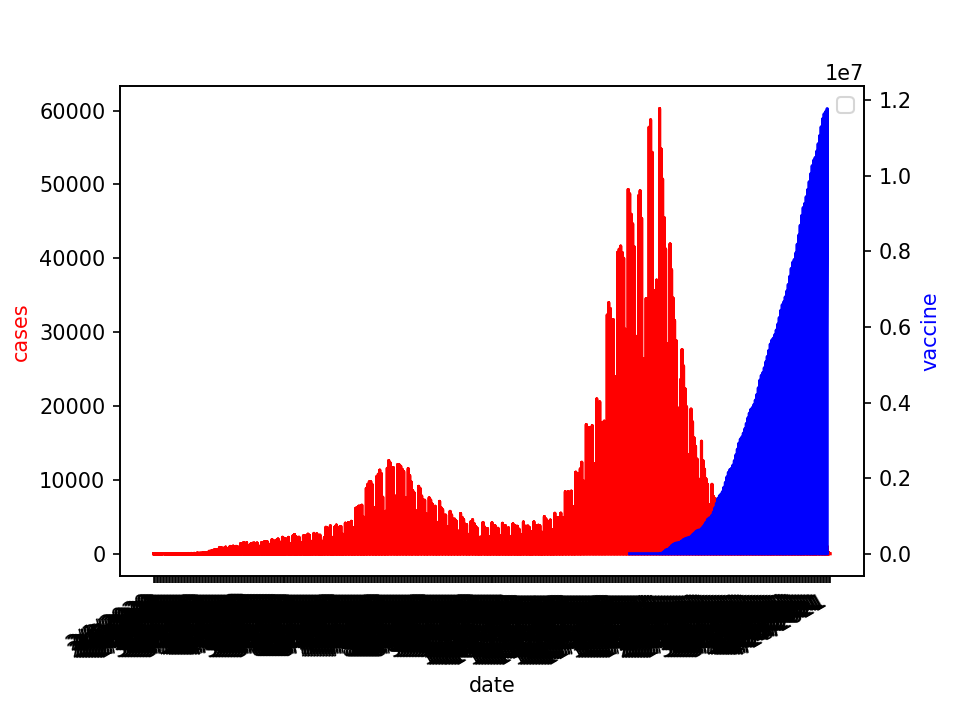

No handles with labels found to put in legend.


In [51]:
vaccine_data = vaccine_data.rename(columns={"administered_date": "date"})

merge_data = pd.merge(cases_data, vaccine_data, 
                   on='date', 
                   how='left')
  
# displaying result
merge_data

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(merge_data.date, merge_data.cases, color="red")
# set x-axis label
ax.set_xlabel("date")
# set y-axis label
ax.set_ylabel("cases",color="red")


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(merge_data.date, merge_data["cumulative_fully_vaccinated"],color="blue")
ax2.set_ylabel("vaccine",color="blue")
plt.show()



#vaccine_plot = ca_counties_vaccine_df.plot('administered_date', 
                                           #'cumulative_fully_vaccinated',
                                          # kind="line", color= "green", figsize=(8,6))
#plt.title(f"vaccine per day in {county1}")
#plt.xlabel("Dates")
#plt.ylabel("vaccine")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()
